# Packages

In [108]:
import matplotlib.pyplot as plt
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc 

from pandas.io.json import json_normalize
from sklearn import cluster, preprocessing
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import set_matplotlib_formats

# Dataframe retrieval

In [109]:
# open Budget dataframe
with open('static_dic/budgets_idf.json') as file:
    data = json.load(file)

df_budget = pd.DataFrame.from_dict(json_normalize(data), orient='columns')
df_budget.set_index('code', inplace=True)

In [110]:
# open Chomage dataframe
with open('static_dic/chomage.json') as file:
    data = json.load(file)

df_chomage = pd.DataFrame.from_dict(json_normalize(data), orient='columns')
df_chomage.set_index('code', inplace=True)

In [111]:
# open Partis dataframe
with open('static_dic/partisidf.json') as file:
    data = json.load(file)

df_partis = pd.DataFrame.from_dict(json_normalize(data), orient='columns')
df_partis.set_index('code', inplace=True)

In [112]:
# open Logmement dataframe
with open('static/logement.json') as file:
    data = json.load(file)

df_logement = pd.DataFrame.from_dict(json_normalize(data), orient='columns')
df_logement.set_index('inseecode', inplace=True)

In [113]:
# open Bac dataframe
with open('static_dic/Bac_js2.json') as file:
    data = json.load(file)

df_bac = pd.DataFrame.from_dict(json_normalize(data), orient='columns')
df_bac.set_index('Code', inplace=True)

In [114]:
# open Siren dataframe
with open('static_dic/sirene_93_01_01_18.json') as file:
    data = json.load(file)

df_siren = pd.DataFrame.from_dict(json_normalize(data), orient='columns')
df_siren.set_index('Insee', inplace=True)

#df_siren.columns

In [115]:
# open population dataframe
with open('static_dic/population.json') as file:
    data = json.load(file)

df_population = pd.DataFrame.from_dict(json_normalize(data), orient='columns')
df_population.set_index('code', inplace=True)

#df_population.columns

# Full dataframe preprocessing

In [116]:
# concatenate dataframes 
df = pd.concat([df_bac, df_budget, df_chomage, df_logement, df_partis, df_population], axis=1, join='outer')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 75114 to 75102
Columns: 419 entries, NbLycees_2008 to nom
dtypes: float64(415), object(4)
memory usage: 4.2+ MB


In [117]:
#df.to_csv('cities.csv', index=False, header=True)

In [118]:
df.head(5)

NbLycees_2008  NbLycees_2009  NbLycees_2010  NbLycees_2011  \
75114            6.0            6.0            6.0            0.0   
75118            4.0            4.0            4.0            0.0   
78621            0.0            0.0            0.0            0.0   
93014            0.0            0.0            0.0            0.0   
93046            0.0            0.0            0.0            0.0   

       NbLycees_2012  NbLycees_2013  NbLycees_2014  NbLycees_2015  \
75114            5.0            5.0            5.0            5.0   
75118            4.0            4.0            4.0            4.0   
78621            1.0            1.0            1.0            1.0   
93014            1.0            1.0            1.0            1.0   
93046            2.0            2.0            2.0            2.0   

       NbLycees_2016  NbLycees_2017            ...               Pop2007  \
75114            5.0            5.0            ...              134382.0   
75118            4.0            4.0            ...              191523.0   
78621            1.0            1.0            ...               29327.0   
93014            1.0            1.0            ...               29674.0   
93046            2.0            2.0            ...               41893.0   

        Pop2008   Pop2009   Pop2010   Pop2011   Pop2012   Pop2013   Pop2014  \
75114  136464.0  137189.0  138299.0  140317.0  141102.0  140799.0  141230.0   
75118  196000.0  200631.0  202685.0  203127.0  201374.0  199519.0  199135.0   
78621   28541.0   28638.0   29380.0   29563.0   29774.0   30979.0   31854.0   
93014   29127.0   29962.0   29750.0   29835.0   30720.0   30725.0   29933.0   
93046   41808.0   41206.0   41808.0   42036.0   42699.0   43099.0   43798.0   

        Pop2015                        nom  
75114  139992.0  PARIS 14E  ARRONDISSEMENT  
75118  197580.0  PARIS 18E  ARRONDISSEMENT  
78621   32346.0                    TRAPPES  
93014   30082.0           CLICHY-SOUS-BOIS  
93046   44415.0               LIVRY-GARGAN  

[5 rows x 419 columns]

In [119]:
df.columns.values

array(['NbLycees_2008', 'NbLycees_2009', 'NbLycees_2010', 'NbLycees_2011',
       'NbLycees_2012', 'NbLycees_2013', 'NbLycees_2014', 'NbLycees_2015',
       'NbLycees_2016', 'NbLycees_2017', 'Privé_2008', 'Privé_2009',
       'Privé_2010', 'Privé_2011', 'Privé_2012', 'Privé_2013',
       'Privé_2014', 'Privé_2015', 'Privé_2016', 'Privé_2017',
       'Public_2008', 'Public_2009', 'Public_2010', 'Public_2011',
       'Public_2012', 'Public_2013', 'Public_2014', 'Public_2015',
       'Public_2016', 'Public_2017', 'Resultat_2008_(50)',
       'Resultat_2008_(50-70)', 'Resultat_2008_(70-80)',
       'Resultat_2008_(80-90)', 'Resultat_2008_(90)', 'Resultat_2009_(50)',
       'Resultat_2009_(50-70)', 'Resultat_2009_(70-80)',
       'Resultat_2009_(80-90)', 'Resultat_2009_(90)', 'Resultat_2010_(50)',
       'Resultat_2010_(50-70)', 'Resultat_2010_(70-80)',
       'Resultat_2010_(80-90)', 'Resultat_2010_(90)', 'Resultat_2011_(50)',
       'Resultat_2011_(50-70)', 'Resultat_2011_(70-80)',
      

### Introduction of new features 

In [120]:
# Create new feature for bac : excellence ratio 
df['Ratio_Resultat_2014_(90)'] = df['Resultat_2014_(90)'] / df['NbLycees_2014']
df['Ratio_Resultat_2014_(90)'].describe()

count    225.000000
mean       0.603138
std        0.426719
min        0.000000
25%        0.000000
50%        0.714286
75%        1.000000
max        1.000000
Name: Ratio_Resultat_2014_(90), dtype: float64

In [121]:
# Create new feature for bac : average score of Lycees in a city in 2014
df['Ratio_Resultat_2014'] = (df['Resultat_2014_(90)']*1 +
                             df['Resultat_2014_(80-90)']*0.9 +
                             df['Resultat_2014_(70-80)']*0.8 +
                             df['Resultat_2014_(50-70)']*0.7 +
                             df['Resultat_2014_(50)']*0.5 ) / df['NbLycees_2014']
df['Ratio_Resultat_2014'].describe()

count    225.000000
mean       0.951827
std        0.057172
min        0.700000
25%        0.900000
50%        0.966667
75%        1.000000
max        1.000000
Name: Ratio_Resultat_2014, dtype: float64

In [122]:
# Charges personnel / depenses
df['Ratio_personnel_2014'] = df['d1.2_2014'] / df['depenses_2014']
df['Ratio_personnel_2008'] = df['d1.2_2008'] / df['depenses_2008']
df['Ratio_personnel_2001'] = df['d1.2_2001'] / df['depenses_2001']
# Charge de personnel par habitant
df['Cout_personnel_hab_2014'] = df['d1.2_2014'] / df['Pop2014']
df['Cout_personnel_hab_2008'] = df['d1.2_2008'] / df['Pop2008']
df['Cout_personnel_hab_2001'] = df['d1.2_2001'] / df['Pop1999']

# Impot local par habitant
df['Impot_hab_2014'] = df['r1.3_2014'] / df['Pop2014']
df['Impot_hab_2008'] = df['r1.3_2008'] / df['Pop2008']
df['Impot_hab_2001'] = df['r1.3_2001'] / df['Pop1999']

# Budget = Investissement + Fonctionnement
# Invest / Budget
df['Ratio_investissement_2014'] = (df['r2_2014'] + df['d2_2014']) / df['budget_2014']
df['Ratio_investissement_2008'] = (df['r2_2008'] + df['d2_2008']) / df['budget_2008']
df['Ratio_investissement_2001'] = (df['r2_2001'] + df['d2_2001']) / df['budget_2001']
# Fonct / Budget
df['Ratio_fonctionnement_2014'] = (df['r1_2014'] + df['d1_2014']) / df['budget_2014']
df['Ratio_fonctionnement_2008'] = (df['r1_2008'] + df['d1_2008']) / df['budget_2008']
df['Ratio_fonctionnement_2001'] = (df['r1_2001'] + df['d1_2001']) / df['budget_2001']

# Budget par habitant
df['budget_hab_2001'] = df['budget_2001'] / df['Pop1999']
df['budget_hab_2008'] = df['budget_2008'] / df['Pop2008']
df['budget_hab_2014'] = df['budget_2014'] / df['Pop2014']

In [123]:
# Encode categorical features for parties
encoder = {"partis.2001" : {"FN" : 8,
                            "UMP-LR" : 5,
                            "DVD" : 3,
                            "UDI" : 1,
                            "SE" : 0,
                            "MoDem" : 0,
                            "PRG" : -1,
                            "EELV" : -1,
                            "DVG" : -3,
                            "PS" : -5,
                            "FG" : -7,
                            "PCF" : -8,
                            "NA" : 0.01},
            "partis.2008" : {"FN" : 8,
                            "UMP-LR" : 5,
                            "DVD" : 3,
                            "UDI" : 1,
                            "SE" : 0,
                            "MoDem" : 0,
                            "PRG" : -1,
                            "EELV" : -1,
                            "DVG" : -3,
                            "PS" : -5,
                            "FG" : -7,
                            "PCF" : -8,
                            "NA" : 0.01},
           "partis.2014" : {"FN" : 8,
                            "UMP-LR" : 5,
                            "DVD" : 3,
                            "UDI" : 1,
                            "SE" : 0,
                            "MoDem" : 0,
                            "PRG" : -1,
                            "EELV" : -1,
                            "DVG" : -3,
                            "PS" : -5,
                            "FG" : -7,
                            "PCF" : -8,
                            "NA" : 0.01}
          }

df.replace(encoder, inplace=True)

### Rows selection

In [124]:
# We drop NAs for the analysis of parties
print('Before drop NA partis :',  df.shape)
df = df[df['partis.2001'] != 0.01]
df = df[df["partis.2008"] != 0.01]
df = df[df["partis.2014"] != 0.01]
print('After drop NA partis :',  df.shape)

Before drop NA partis : (1302, 439)
After drop NA partis : (511, 439)


In [125]:
# Select the most imprtant cities
print('Before drop small cities :',  df.shape)
df = df[df['Pop2015'] > 50]
print('After drop small cities :',  df.shape)

# Paris outlier
print('Before drop Paris :',  df.shape)
df = df[df['Pop2015'] < 1000000]
print('After drop Paris :',  df.shape)

# get rid of NaNs
#df = df.dropna(axis=0, how='any')

Before drop small cities : (511, 439)
After drop small cities : (508, 439)
Before drop Paris : (508, 439)
After drop Paris : (507, 439)


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 507 entries, 75114 to 75102
Columns: 439 entries, NbLycees_2008 to budget_hab_2014
dtypes: float64(438), object(1)
memory usage: 1.7+ MB


In [127]:
df.describe()

NbLycees_2008  NbLycees_2009  NbLycees_2010  NbLycees_2011  \
count     185.000000     185.000000     185.000000          185.0   
mean        0.659459       0.675676       0.691892            0.0   
std         2.235516       2.277657       2.304813            0.0   
min         0.000000       0.000000       0.000000            0.0   
25%         0.000000       0.000000       0.000000            0.0   
50%         0.000000       0.000000       0.000000            0.0   
75%         0.000000       0.000000       0.000000            0.0   
max        15.000000      15.000000      14.000000            0.0   

       NbLycees_2012  NbLycees_2013  NbLycees_2014  NbLycees_2015  \
count     185.000000     185.000000     185.000000     185.000000   
mean        2.064865       2.054054       2.086486       2.075676   
std         1.884176       1.852524       1.906249       1.901002   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.000000       1.000000       1.000000       1.000000   
50%         1.000000       1.000000       1.000000       1.000000   
75%         2.000000       2.000000       2.000000       2.000000   
max        13.000000      13.000000      13.000000      13.000000   

       NbLycees_2016  NbLycees_2017       ...         Impot_hab_2001  \
count     185.000000     185.000000       ...             487.000000   
mean        2.091892       1.805405       ...             478.331563   
std         1.930079       1.792185       ...             271.632899   
min         0.000000       0.000000       ...              98.360656   
25%         1.000000       1.000000       ...             315.668895   
50%         1.000000       1.000000       ...             416.591252   
75%         2.000000       2.000000       ...             585.698378   
max        13.000000      13.000000       ...            2181.804806   

       Ratio_investissement_2014  Ratio_investissement_2008  \
count                 487.000000                 486.000000   
mean                    0.261326                   0.282631   
std                     0.105509                   0.112616   
min                     0.067864                   0.064667   
25%                     0.193696                   0.205164   
50%                     0.245307                   0.266097   
75%                     0.318517                   0.340414   
max                     0.734069                   0.681497   

       Ratio_investissement_2001  Ratio_fonctionnement_2014  \
count                 487.000000                 487.000000   
mean                    0.276052                   0.738674   
std                     0.101405                   0.105509   
min                     0.029605                   0.265931   
25%                     0.209459                   0.681483   
50%                     0.266248                   0.754693   
75%                     0.327753                   0.806304   
max                     0.879589                   0.932136   

       Ratio_fonctionnement_2008  Ratio_fonctionnement_2001  budget_hab_2001  \
count                 486.000000                 487.000000       487.000000   
mean                    0.717369                   0.723948      2756.514999   
std                     0.112616                   0.101405      1222.851881   
min                     0.318503                   0.120411       852.238806   
25%                     0.659586                   0.672247      2029.914881   
50%                     0.733903                   0.733752      2577.289211   
75%                     0.794836                   0.790541      3194.629045   
max                     0.935333                   0.970395     11163.934426   

       budget_hab_2008  budget_hab_2014  
count       486.000000       487.000000  
mean       3180.847900      3347.202576  
std        1402.446543      1580.888323  
min        1017.035775      1007.396450  
25%        2322.644498      2429.164548  
50%  

# Feature sets definition

In [151]:
features_all = list(df.columns)

features_recent = ['partis.2014', 
            'chomage', 
            'housing',
            'main_res', 
            'portion_hlm_tenant',
            'budget_2015', 
            'd1.2_2015', 
            'd1.3_2015', 
            'd1.4_2015', 
            'd1.5_2015', 
            'd1_2015',
            'd2.1_2015',
            'd2.2_2015',
            'd2.3_2015',
            'd2_2015',
            'depenses_2015',
            'r1.1_2015',
            'r1.2_2015',
            'r1.3_2015',
            'r1_2015',
            'r2.1_2015',
            'r2.2_2015',
            'r2_2015',
            'recettes_2015',
            'NbLycees_2017',
            'Privé_2017',
            'Public_2017',
            'Resultat_2017_(50)',
            'Resultat_2017_(50-70)',
            'Resultat_2017_(70-80)',
            'Resultat_2017_(80-90)',
            'Resultat_2017_(90)'
           ]

features_2001 = ['Ratio_personnel_2001',
            'Cout_personnel_hab_2001',
            'Impot_hab_2001',
            'Ratio_investissement_2001',
            'Ratio_fonctionnement_2001',
            'budget_hab_2001',
            'Pop1999',
            'partis.2001', 
            'budget_2001', 
            'd1.2_2001', 
            'd1.3_2001', 
            'd1.4_2001', 
            'd1.5_2001', 
            'd1_2001',
            'd2.1_2001',
            'd2.2_2001',
            'd2.3_2001',
            'd2_2001',
            'depenses_2001',
            'r1.1_2001',
            'r1.2_2001',
            'r1.3_2001',
            'r1_2001',
            'r2.1_2001',
            'r2.2_2001',
            'r2_2001',
            'recettes_2001'
           ]

features_2008 = ['Ratio_personnel_2008',
            'Cout_personnel_hab_2008',
            'Impot_hab_2008',
            'Ratio_investissement_2008',
            'Ratio_fonctionnement_2008',
            'budget_hab_2008',
            'Pop2008',
            'partis.2008', 
            'budget_2008', 
            'd1.2_2008', 
            'd1.3_2008', 
            'd1.4_2008', 
            'd1.5_2008', 
            'd1_2008',
            'd2.1_2008',
            'd2.2_2008',
            'd2.3_2008',
            'd2_2008',
            'depenses_2008',
            'r1.1_2008',
            'r1.2_2008',
            'r1.3_2008',
            'r1_2008',
            'r2.1_2008',
            'r2.2_2008',
            'r2_2008',
            'recettes_2008'
           ]

features_2014 = ['Ratio_personnel_2014',
            'Cout_personnel_hab_2014',
            'Impot_hab_2014',
            'Ratio_investissement_2014',
            'Ratio_fonctionnement_2014',
            'budget_hab_2014',
            'Pop2014',
            'partis.2014', 
            'budget_2014', 
            'd1.2_2014', 
            'd1.3_2014', 
            'd1.4_2014', 
            'd1.5_2014', 
            'd1_2014',
            'd2.1_2014',
            'd2.2_2014',
            'd2.3_2014',
            'd2_2014',
            'depenses_2014',
            'r1.1_2014',
            'r1.2_2014',
            'r1.3_2014',
            'r1_2014',
            'r2.1_2014',
            'r2.2_2014',
            'r2_2014',
            'recettes_2014'
           ]

features_cluster_2014 = [
            'Ratio_personnel_2014',
            'Cout_personnel_hab_2014',
            'Impot_hab_2014',
            'budget_hab_2014',
            'partis.2014',  
#            'Ratio_Resultat_2014',
            'Pop2014'
           ]

### Reminder on Budget labels
* __d1 : dépenses de fonctionnement__
    - d1.1 : achats et autres charges externes
    - d1.2 : charges de personnel
    - d1.3 : charges financières
    - d1.4 : contingents
    - d1.5 : subventions versées
* __d2 : emplois d'investissements__
    - d2.1 : charges a répartir
    - d2.2 : depenses d’equipement
    - d2.3 : remboursement d'emprunts et dettes assimilées
* __r1 : total des produits de fonctionnement__
    - r1.1 : autres impôts et taxes
    - r1.2 : dotation globale de fonctionnement
    - r1.3 : impots locaux
* __r2 : total des ressources d'investissement__
    - r2.1 : emprunts bancaires et dettes assimilées
    - r2.2 : subventions reçues
    

# Data Analysis

shape (484, 26)


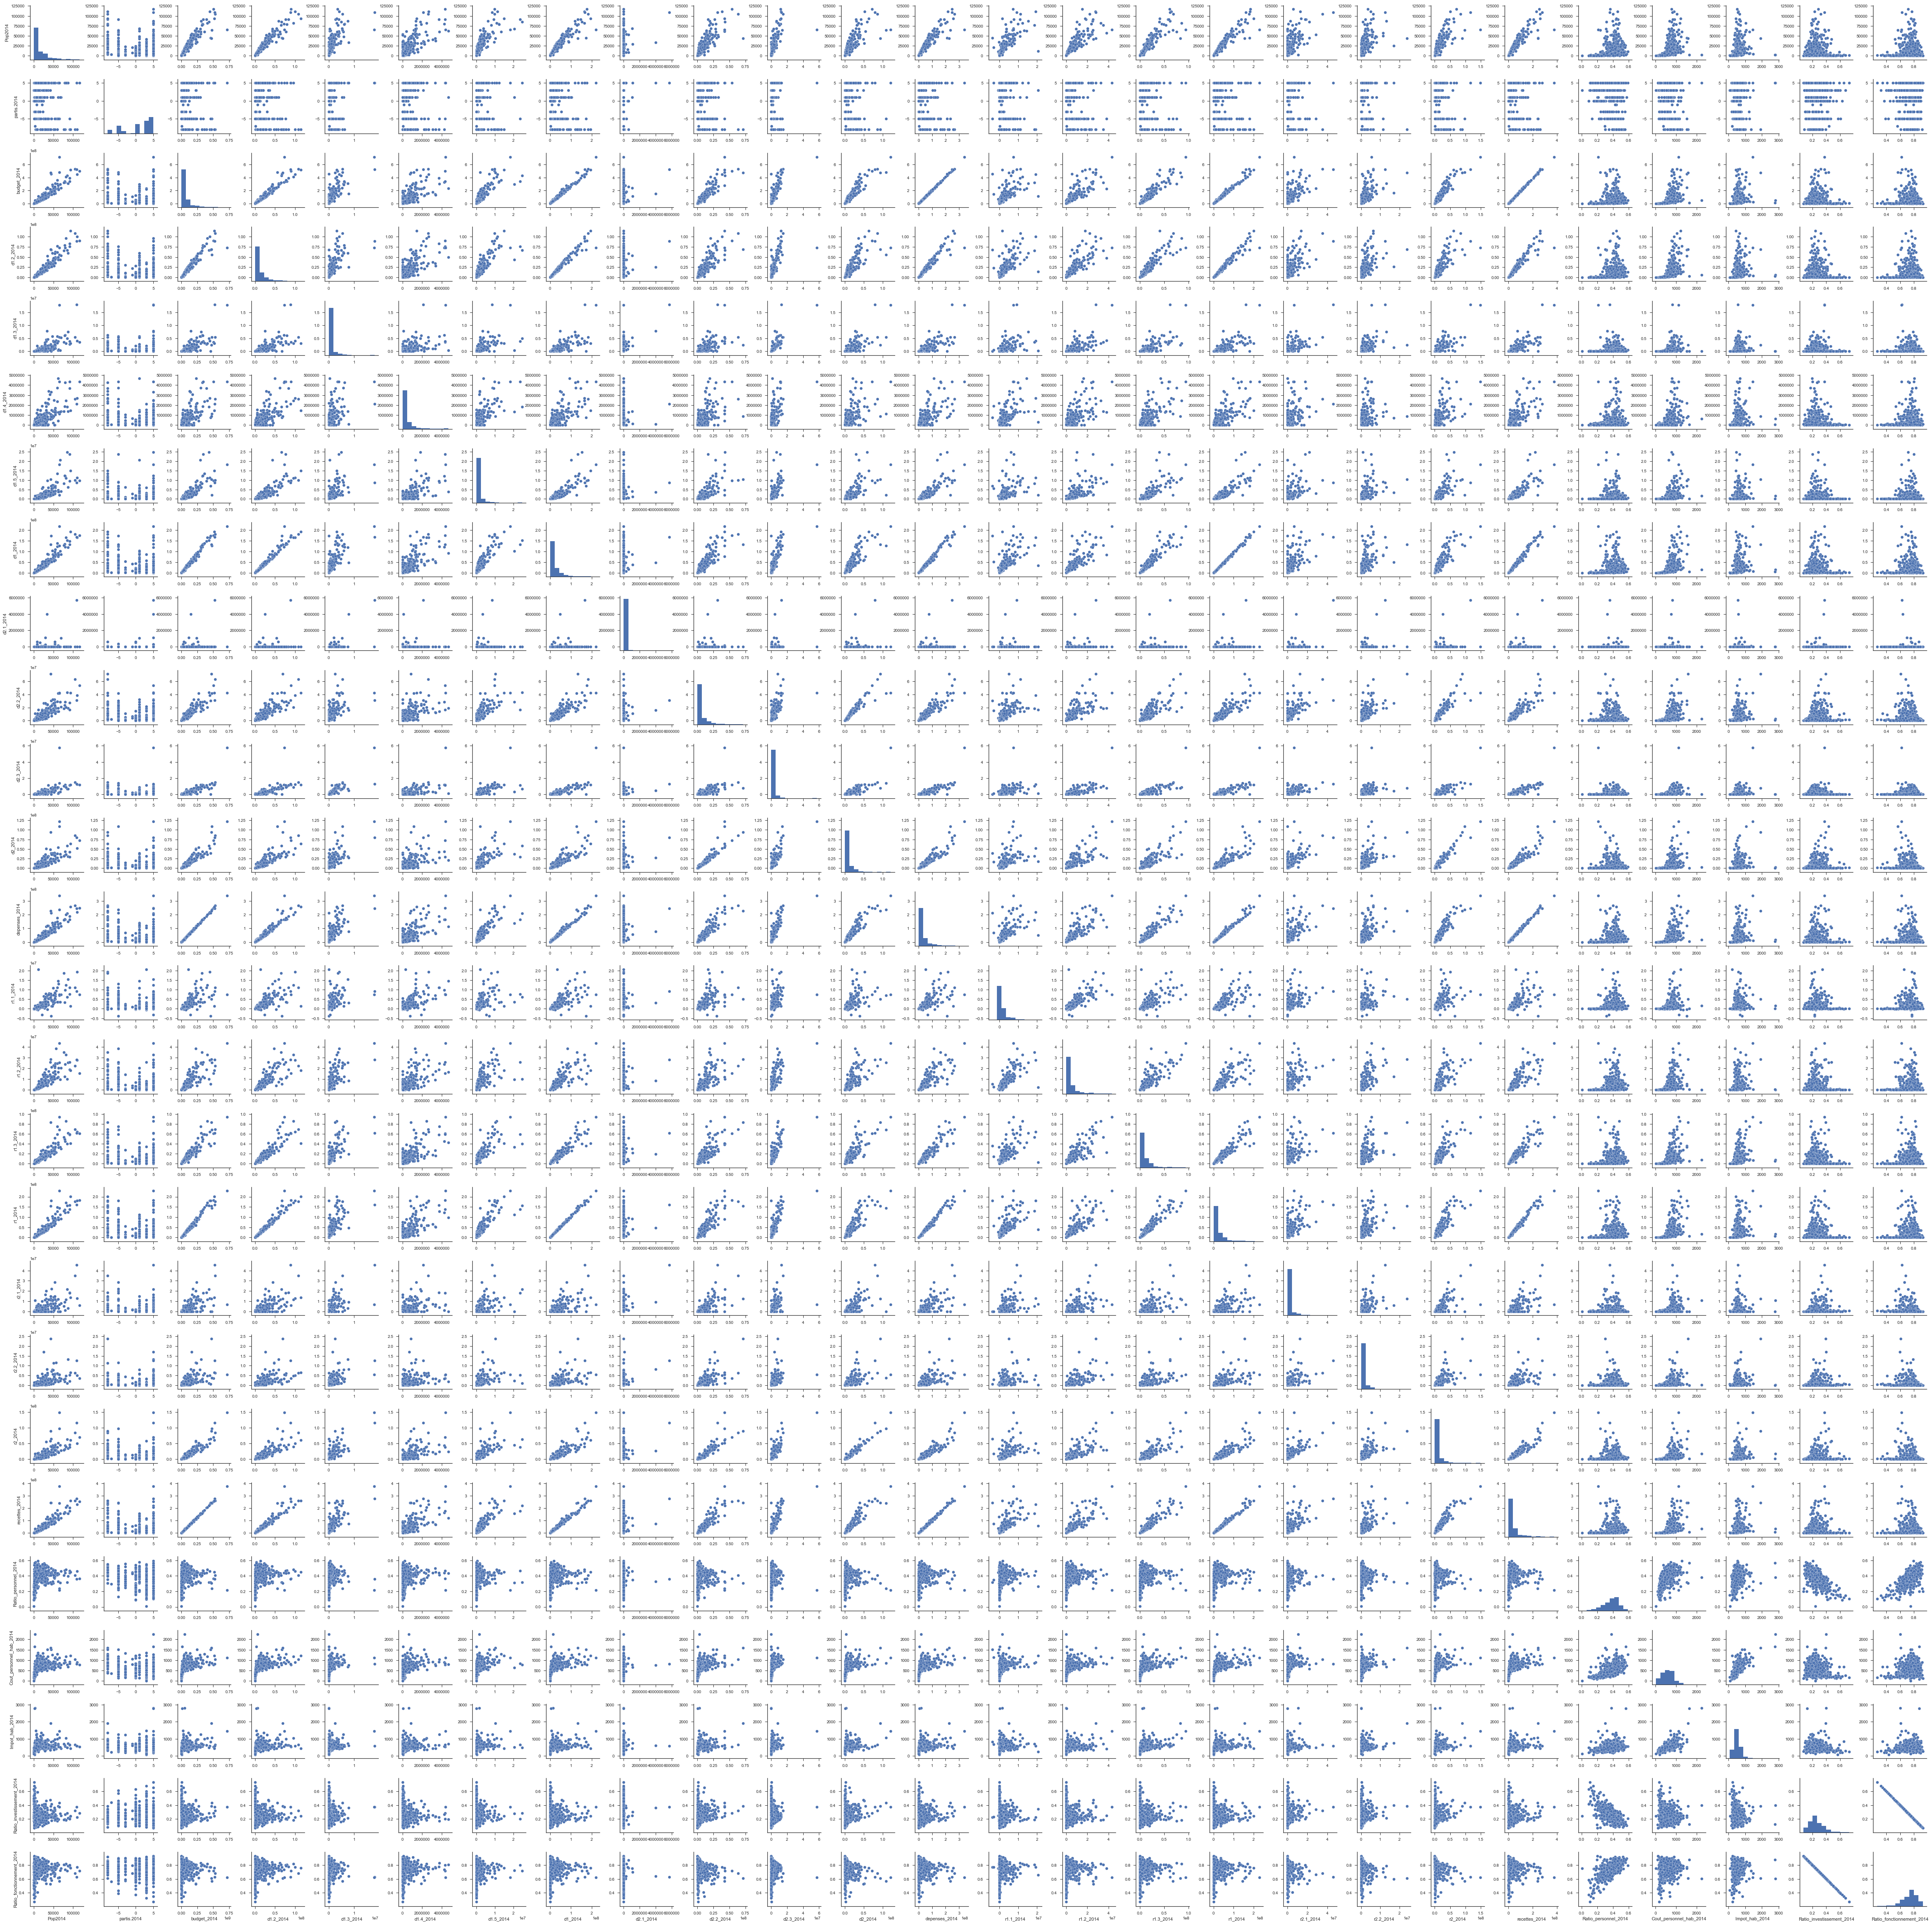

In [25]:
from pandas.plotting import scatter_matrix
import seaborn as sns
sns.set(style="ticks")

features_selected = features_2014
df_selected = df[features_selected].dropna(axis=0, how='any')
print('shape' , df_selected.shape )
sns.pairplot(df_selected, diag_kind='hist')

# selection of features for analysis
#features_selected = features_cluster_2014

#scatter_matrix(df[features_selected], alpha=1,
#               figsize=(45, 45), diagonal='kde', labelrotation=45);

# Correlation Analysis

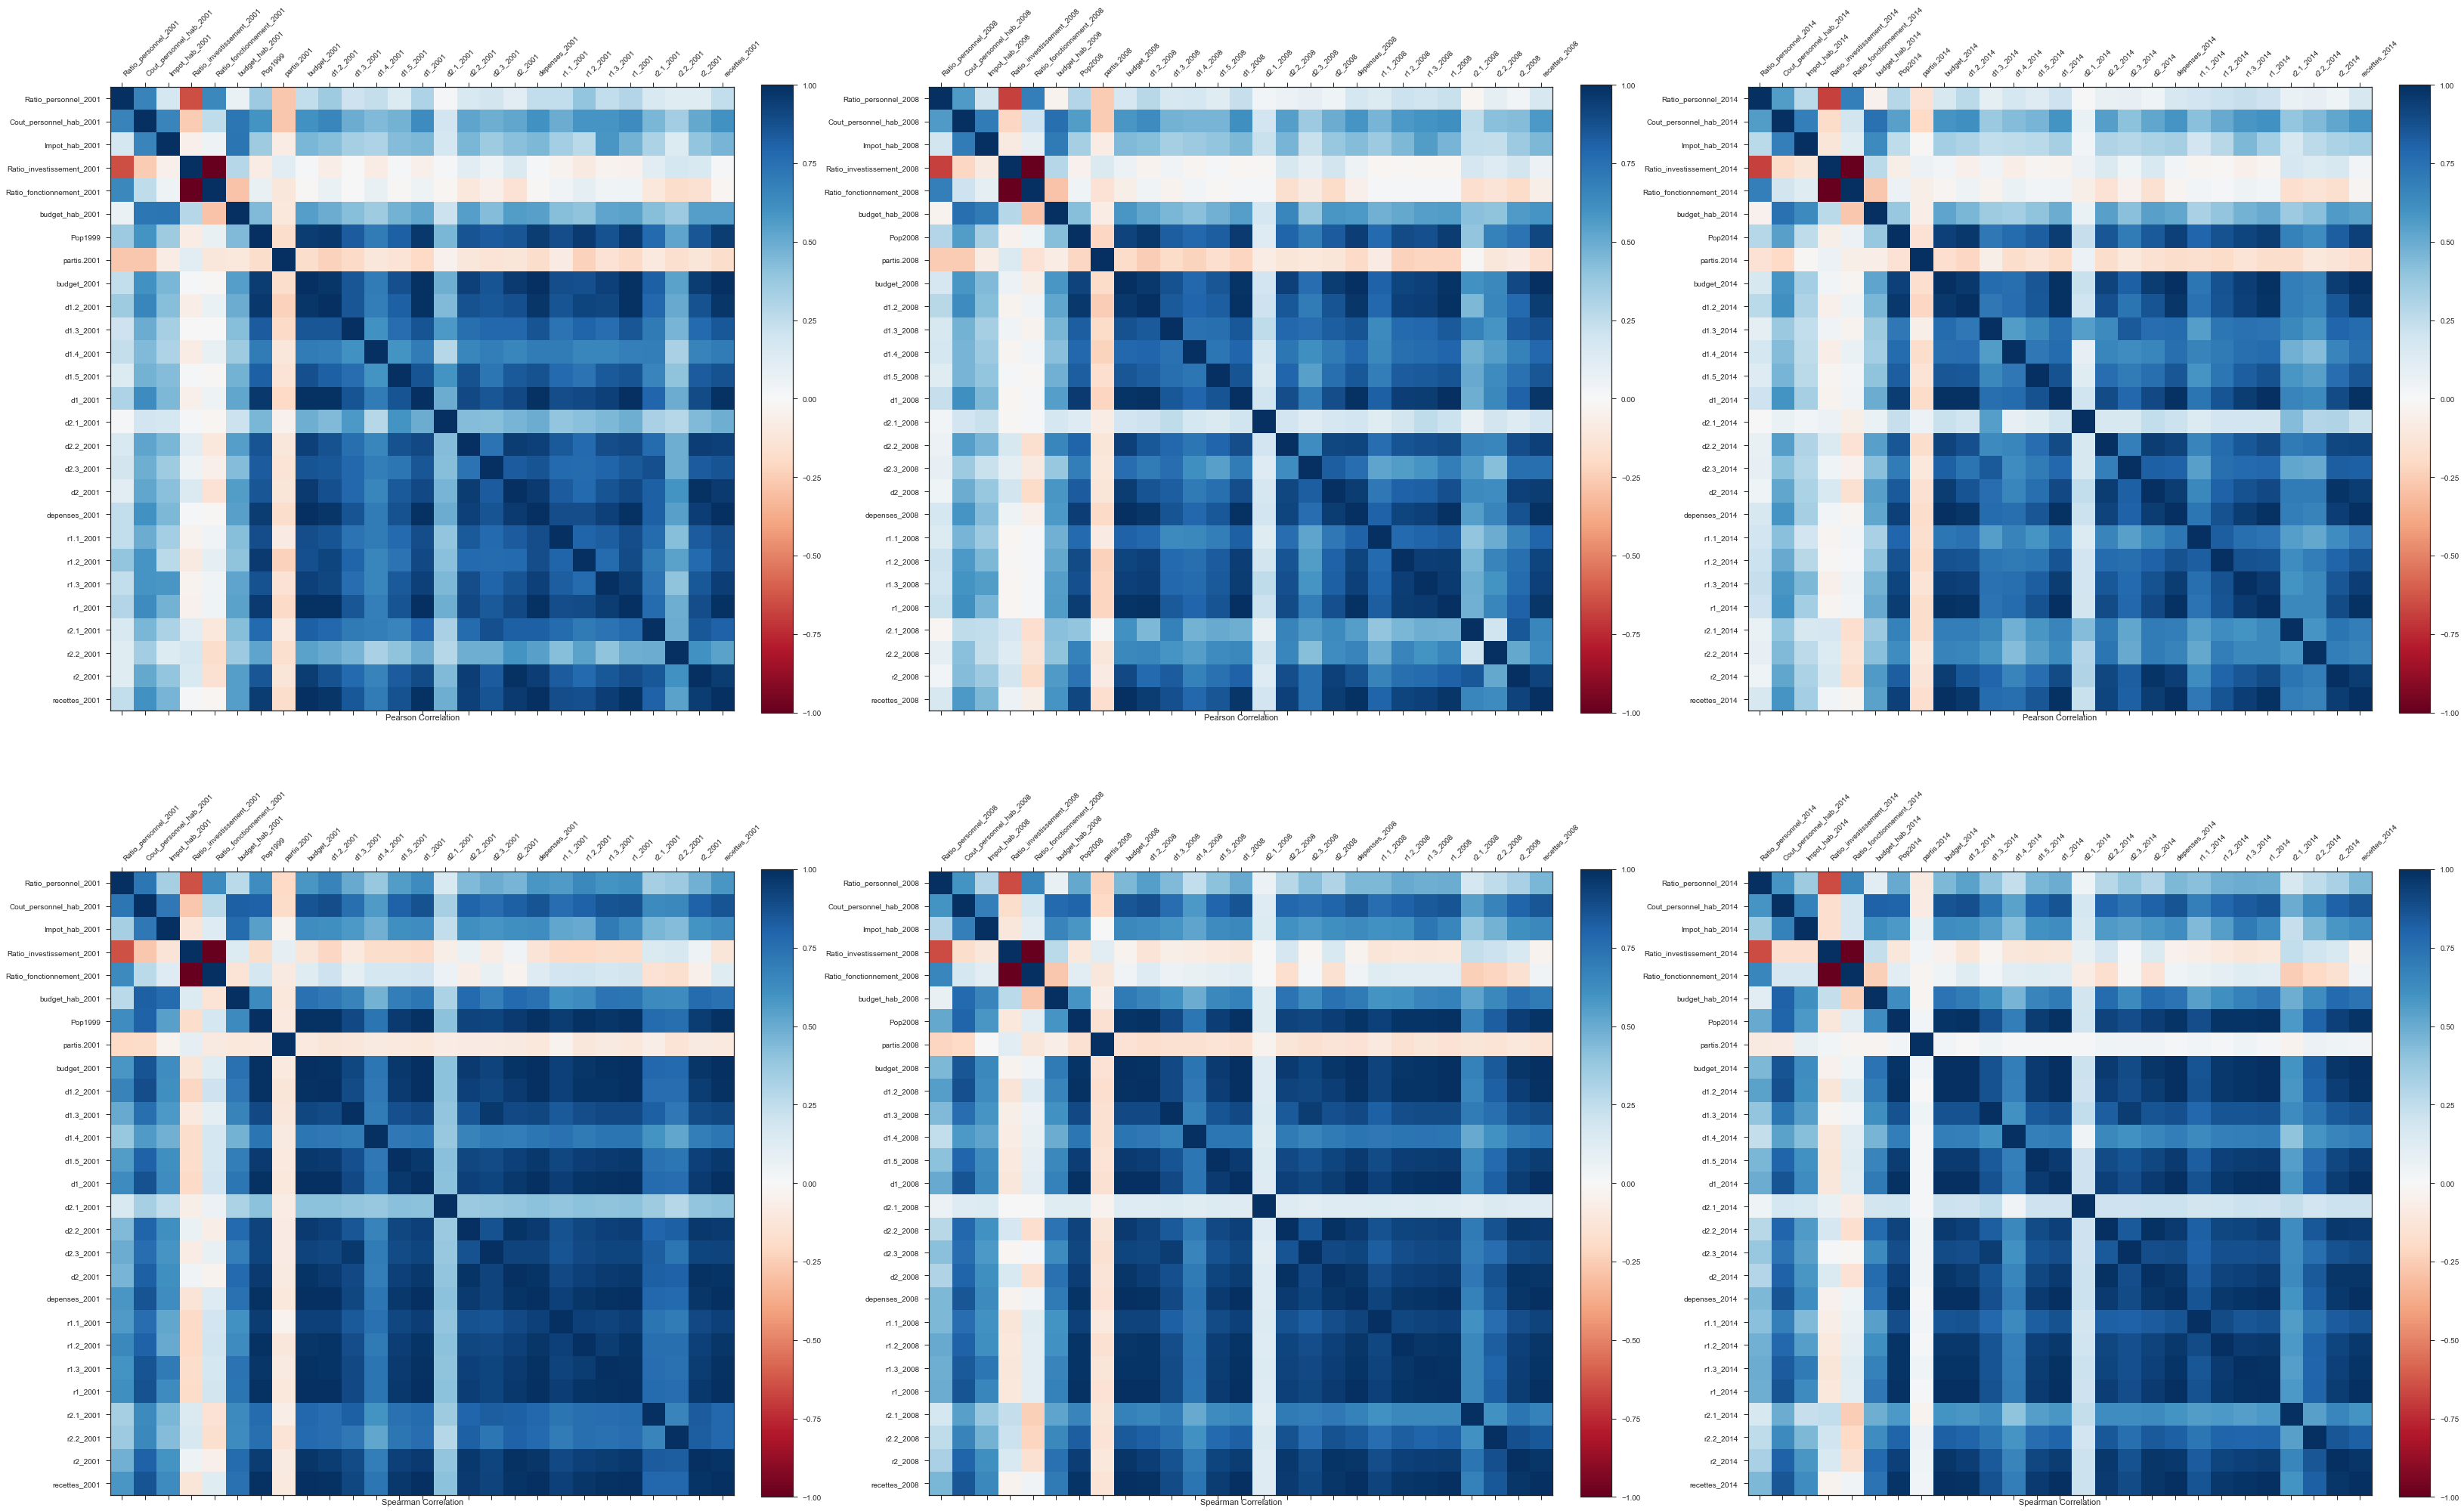

In [64]:
# selection of features for correlations
features_selected = [features_2001, features_2008, features_2014]
l = len(features_selected)

# correlation between features, for years 2001, 2008 and 2014
fig = plt.figure(figsize=(55,35))

for i,feature in enumerate(features_selected):
    correlations = df[feature].corr(method='pearson')
    ax = fig.add_subplot(200+10*l+1+i)
    cax = ax.matshow(correlations, cmap='RdBu',vmin=-1, vmax=1)
    fig.colorbar(cax, fraction=0.046, pad=0.04)
    ticks = np.arange(0,len(feature),1)
    ax.set_xlabel('Pearson Correlation')
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_xticklabels(feature, rotation=45, ha='left')
    ax.set_yticklabels(feature) 

for i,feature in enumerate(features_selected):
    correlations = df[feature].corr(method='spearman')
    ax = fig.add_subplot(200+10*l+4+i)
    cax = ax.matshow(correlations, cmap='RdBu',vmin=-1, vmax=1)
    fig.colorbar(cax, fraction=0.046, pad=0.04)
    ticks = np.arange(0,len(feature),1)
    ax.set_xlabel('Spearman Correlation')
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_xticklabels(feature, rotation=45, ha='left')
    ax.set_yticklabels(feature)
plt.show()

# Clustering

In [152]:
# choose one feature set
features_selected = features_cluster_2014
n_features = len(features_selected)

df_selected = df[features_selected].dropna(axis=0, how='any')

data = df_selected.values
print('NaN remaining ? :', np.isnan(data).any())

df_selected.info()
# Note : if "Index : 0 entries" is printed under this box, run again the "complete dataframe preprocessing" block

NaN remaining ? : False
<class 'pandas.core.frame.DataFrame'>
Index: 484 entries, 78621 to 94060
Data columns (total 6 columns):
Ratio_personnel_2014       484 non-null float64
Cout_personnel_hab_2014    484 non-null float64
Impot_hab_2014             484 non-null float64
budget_hab_2014            484 non-null float64
partis.2014                484 non-null float64
Pop2014                    484 non-null float64
dtypes: float64(6)
memory usage: 26.5+ KB


In [154]:
# Standardize data
scaler = preprocessing.StandardScaler()
data_s = scaler.fit_transform(data)

# Normalize data (be careful with outliers)
normalizer = preprocessing.MinMaxScaler()
data_n = normalizer.fit_transform(data)

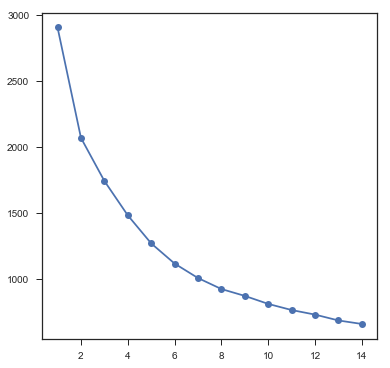

In [155]:
# Elbow analysis to find optimal number of clusters (k)
# ie k that minimizes the sum of squared distances of samples to their closest cluster center

data = data_s

k_range = np.arange(1,15)
clusters_error = []

for k in k_range:
    cluster_k = cluster.KMeans(n_clusters=k)
    cluster_k.fit(data)
    clusters_error.append(cluster_k.inertia_)

plt.figure(figsize=(6,6))
plt.plot(k_range, clusters_error, marker='o')

In [161]:
# Run KMeans on one of the scaled data 
data = data_s
n_clusters = 5

kmeans = cluster.KMeans(n_clusters=n_clusters, random_state=0).fit(data)

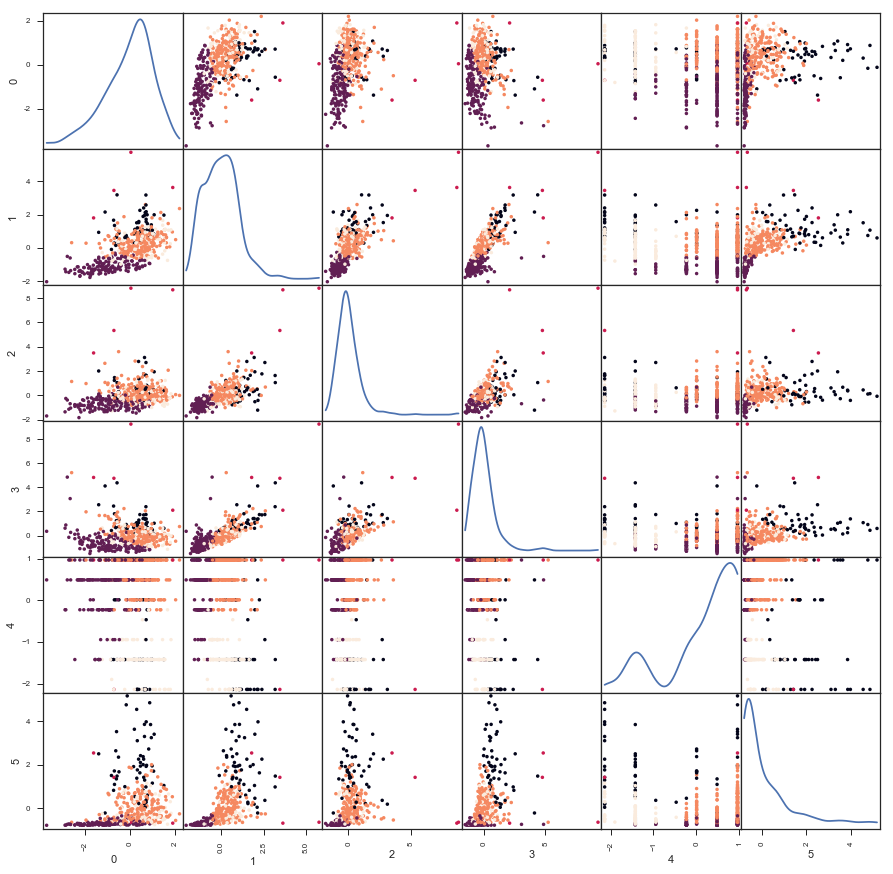

In [162]:
# Plot 2D
from pandas.plotting import scatter_matrix

scatter_matrix(pd.DataFrame(data=data_s), alpha=1,
               figsize=(15, 15), diagonal='kde', c=kmeans.labels_);

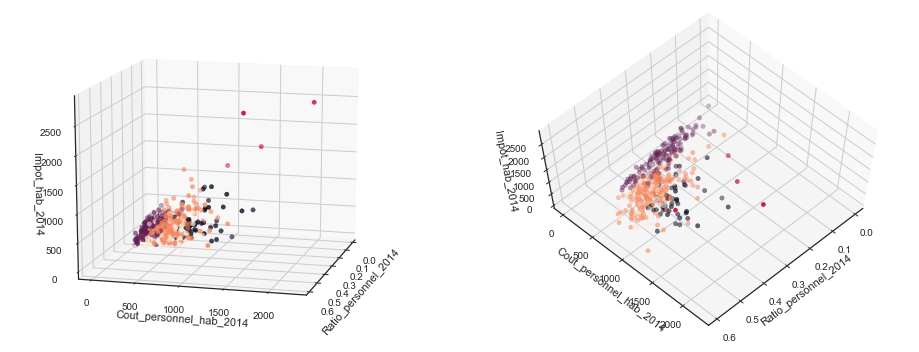

In [163]:
# Plot 3D

ax1 = str(features_selected[0])
ax2 = str(features_selected[1])
ax3 = str(features_selected[2])

fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(df_selected[ax1], df_selected[ax2], df_selected[ax3], c=kmeans.labels_)
ax.set_xlabel(ax1)
ax.set_ylabel(ax2)
ax.set_zlabel(ax3)
ax.view_init(elev=15., azim=15)

ax = fig.add_subplot(122, projection='3d')
ax.scatter(df_selected[ax1], df_selected[ax2], df_selected[ax3], c=kmeans.labels_)
ax.set_xlabel(ax1)
ax.set_ylabel(ax2)
ax.set_zlabel(ax3)
ax.view_init(elev=65., azim=45)

In [164]:
# Cluster centroïds (standardized coordinates...)

centroids = kmeans.cluster_centers_
np.set_printoptions(suppress=True) # To print in a readable format 

centroids_df = pd.DataFrame(data = np.round(scaler.inverse_transform(centroids), 3), columns=features_selected)
centroids_df

Ratio_personnel_2014  Cout_personnel_hab_2014  Impot_hab_2014  \
0                 0.404                  959.761         662.461   
1                 0.279                  284.769         355.660   
2                 0.365                 1653.486        2234.991   
3                 0.416                  688.173         619.755   
4                 0.424                  645.650         521.219   

   budget_hab_2014  partis.2014    Pop2014  
0         4965.825       -2.673  55049.891  
1         2373.056        2.028   1824.559  
2        11626.780        1.750  28403.000  
3         3525.085        3.688  15875.945  
4         3154.314       -5.072  10555.337

Total silhouette score : 0.284193428494


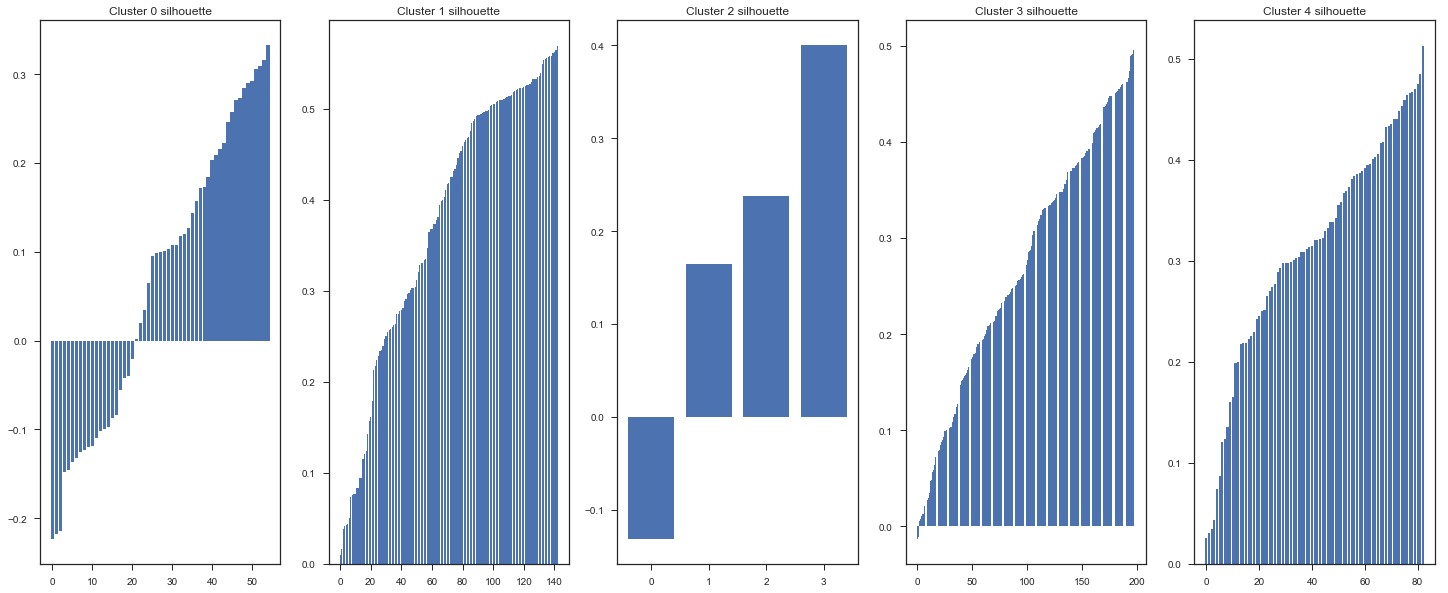

In [167]:
# Metrics to assess the quality of clusters
from sklearn import metrics

sil = metrics.silhouette_samples(data, kmeans.labels_, metric='euclidean')
sil_score = metrics.silhouette_score(data, kmeans.labels_)
print('Total silhouette score :', sil_score)

fig = plt.figure(figsize=(25,10))
for i in range(n_clusters):
    sil_cluster_i = np.sort(sil[kmeans.labels_==i])
    ax = fig.add_subplot(100+10*n_clusters+i+1)
    ax.bar(x=range(len(sil_cluster_i)), height=sil_cluster_i)
    ax.set_title('Cluster {} silhouette'.format(i))
plt.show()

In [166]:
# With convex hull to visually identify the clusters 
#
#from scipy.spatial import ConvexHull
#from matplotlib.patches import Polygon

#cluster_points = np.array(np.array([
#    np.array([data[p] for p in range(len(data)) if kmeans.labels_[p]==i])
#    for i in range(kmeans.n_clusters)
#    ]))

#fig = plt.figure(figsize=(8,6))
#ax = fig.add_subplot(111, projection='3d')

#for c, cluster in enumerate(cluster_points):
#    points = cluster[:]
#    hull = ConvexHull(cluster)
#    simplex = hull.simplices
#    ax.scatter(points[simplex, 0], points[simplex, 1], points[simplex, 2])

## Mini CR de la dernière fois, les pistes à explorer sont :

- etudier temporalité des correlations
- voir résultats attendus et surprenants dans l'analyse des correlation (lire articles de socio, étdues des votants... comme base de comaraison)
- heatmap dans les plot des features, quitte a faire des regressions, afin de faire apparaitres des tendances

- Début Mai : isoler un bout de code (500-1000 lignes) a envoyer aux potes à Jospeh qui peuvent corriger/améliorer notre façon de coder
- Début Mai : Appeler chercheurs Science Po, Universitaires en socio, etc pour discuter des corrélations, éventuellement qu'ils nous parlent d'une question non-résolu à laquelle on pourrait contribuer avec nos données

- Fin Mai : Visualisation indépendantes des chercheurs (à nous) 
- Fin du projet : un beau code, un rapport
- Fin projet : une belle analyse avec des visu et des inputs de chercheurs et sociologues

# CR - 11 Mai 
- Ratios pour les investissements
- Méthodes lasso (ou autres) pour réduire le nombre de features
- Prédire le clusters pour une nouvelle donnée
- Faire plein plein de graphes, pour pouvoir en interpreter certains (tester d'autres modèles, ...)
- Etudiants de Science Po (Fb), ça nous aidera à avoir des indicateurs pertinents 
- Répartition des taches : 
    - PE : contact Science Po
    - RV & Nico : Prediction temporelle
    - Clement & José : Cluster/Correlation
